<a href="https://colab.research.google.com/github/AntonioFuziy/iris_recognition/blob/main/Iris_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Detection

**Alunos: Antonio Fuziy e Victor Vergara**

_________

Lines to add image files and G6_IrisRecognition lib

In [70]:
!git clone https://github.com/lucianosilva-github/G6_iris_recognition.git

fatal: destination path 'G6_iris_recognition' already exists and is not an empty directory.


In [71]:
!git clone https://github.com/lucianosilva-github/images-tutorial.git

fatal: destination path 'images-tutorial' already exists and is not an empty directory.


In [72]:
!git clone https://github.com/lucianosilva-github/images.git

fatal: destination path 'images' already exists and is not an empty directory.


In [73]:
import G6_iris_recognition

In [74]:
import cv2
import cv2 as cv
from google.colab.patches import cv2_imshow
import sys
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import random
import os
import shutil

## Separating folders

In [75]:
if os.path.exists("/content/train"):
  shutil.rmtree("train")
if os.path.exists("/content/test"):
  shutil.rmtree("test")

In [76]:
if not os.path.exists('/content/model.pickle'):
    os.mknod('/content/model.pickle')
list_directorys=["/content/test"]

for i in list_directorys:
  try:
      os.mkdir(i,0o666)
  except OSError:
      print ("Creation of the directory %s failed" % i)
  else:
    print ("Successfully created the directory %s " % i)
shutil.copytree('images', 'train')

Successfully created the directory /content/test 


'train'

In [77]:
for i in os.listdir('train'):
  lista_temp = []
  for j in os.listdir(f'train/{i}'):
    lista_temp.append(f'train/{i}/{j}')
  random.shuffle(lista_temp)
  size = len(lista_temp)
  test_size = int(0.2*size)
  test_image = lista_temp[0:test_size]
  for image in test_image:
    shutil.move(image, 'test')

In [78]:
def convert_image(image_path):
  imgs = []
  print(f"converting image {image_path}")
  img = cv2.imread(image_path)
  img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  H,S,V = cv2.split(img_hsv)
  V_equalized=cv2.equalizeHist(V)
  img_equalized = cv2.cvtColor(cv2.merge((H,S,V_equalized)), cv2.COLOR_HSV2BGR)
  blur_equalized = cv2.GaussianBlur(img_equalized,(3,3),cv.BORDER_DEFAULT)
  imgs.append(blur_equalized)
  cv2.imwrite(image_path, blur_equalized)
  return imgs

## Converting to train

converting image train/0000/0000_000.bmp
converting image train/0000/0000_001.bmp
image path doesnt exist
converting image train/0000/0000_002.bmp
image path doesnt exist
converting image train/0000/0000_003.bmp
converting image train/0000/0000_004.bmp
converting image train/0000/0000_005.bmp
converting image train/0000/0000_006.bmp
image path doesnt exist
converting image train/0000/0000_007.bmp
image path doesnt exist
converting image train/0000/0000_008.bmp
converting image train/0000/0000_009.bmp
converting image train/0000/0000_010.bmp
converting image train/0000/0000_011.bmp
converting image train/0000/0000_012.bmp
converting image train/0000/0000_013.bmp
converting image train/0000/0000_014.bmp
converting image train/0000/0000_015.bmp
converting image train/0000/0000_016.bmp
converting image train/0000/0000_017.bmp
converting image train/0000/0000_018.bmp
converting image train/0001/0001_000.bmp
converting image train/0001/0001_001.bmp
image path doesnt exist
converting image tr

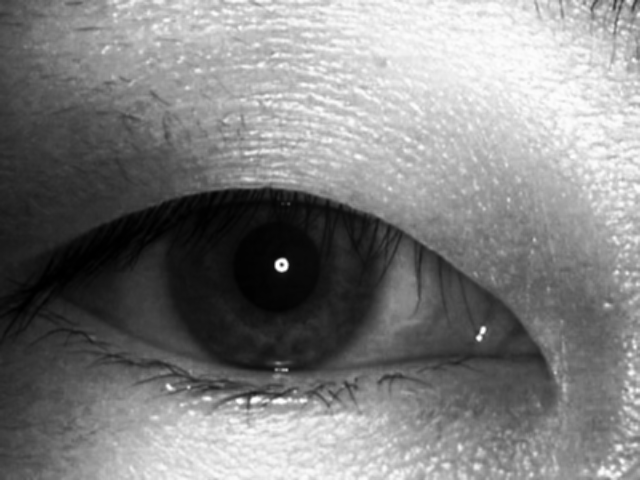

In [79]:
imgs = []
for i in range(59):
  for j in range(19):
    try:
      image_path = f"train/00{i:02d}/00{i:02d}_0{j:02d}.bmp"
      imgs = convert_image(image_path)
    except:
      print("image path doesnt exist")
cv2_imshow(imgs[0])

## Converting to test

In [80]:
path =r'/content/test'
list_of_files = []

imgs = []

for root, dirs, files in os.walk(path):
	for file in files:
		list_of_files.append(os.path.join(root,file))
  
for image_path in list_of_files:
    try:
      imgs = convert_image(image_path)
    except:
      print("image path doesnt exist")

# cv2_imshow(imgs[0])

converting image /content/test/0009_016.bmp
converting image /content/test/0006_007.bmp
converting image /content/test/0039_019.bmp
converting image /content/test/0024_011.bmp
converting image /content/test/0037_007.bmp
converting image /content/test/0044_001.bmp
converting image /content/test/0059_009.bmp
converting image /content/test/0048_000.bmp
converting image /content/test/0034_017.bmp
converting image /content/test/0055_000.bmp
converting image /content/test/0047_003.bmp
converting image /content/test/0033_007.bmp
converting image /content/test/0017_014.bmp
converting image /content/test/0023_018.bmp
converting image /content/test/0043_003.bmp
converting image /content/test/0029_000.bmp
converting image /content/test/0045_016.bmp
converting image /content/test/0003_007.bmp
converting image /content/test/0016_002.bmp
converting image /content/test/0025_015.bmp
converting image /content/test/0056_015.bmp
converting image /content/test/0031_010.bmp
converting image /content/test/0

In [81]:
def plot_images(array_images, rows, cols):
  n_rows = rows
  n_cols = cols

  fig = plt.figure(figsize=(20, 15))
  grid = ImageGrid(fig, 111, nrows_ncols=(n_rows, n_cols))

  for figure, img in zip(grid, array_images):
      figure.imshow(img, cmap="gray")

  plt.show()

In [82]:
G6_iris_recognition.iris_model_train("train","model.pickle")

directory_list ['train/.git/logs/refs/remotes/origin', 'train/.git/logs/refs/remotes', 'train/.git/logs/refs/heads', 'train/.git/logs/refs', 'train/.git/objects/info', 'train/.git/objects/pack', 'train/.git/info', 'train/.git/logs', 'train/.git/hooks', 'train/.git/objects', 'train/.git/branches', 'train/0014', 'train/0047', 'train/0034', 'train/0030', 'train/0016', 'train/0052', 'train/0054', 'train/0053', 'train/0035', 'train/0059', 'train/0022', 'train/0056', 'train/0008', 'train/0023', 'train/0011', 'train/0021', 'train/0042', 'train/0006', 'train/0009', 'train/0046', 'train/0038', 'train/0010', 'train/0025', 'train/0041', 'train/0051', 'train/0029', 'train/0013', 'train/0000', 'train/0027', 'train/0037', 'train/0018', 'train/0031', 'train/0003', 'train/0005', 'train/0040', 'train/0048', 'train/0032', 'train/0026', 'train/0017', 'train/0001', 'train/0007', 'train/0036', 'train/0015', 'train/0033', 'train/0020', 'train/0049', 'train/.git', 'train/0019', 'train/0057', 'train/0043', 't

['info', 'branches']

In [83]:
accurancy = 0
correct_images = 0
incorrect_images = 0
all_images = 0

# for root, dirs, files in os.walk(path):
# 	for file in files:
# 		list_of_files.append(os.path.join(root,file))
  
for image_path in os.listdir("test"):
    try:
      image_status = G6_iris_recognition.iris_model_test("model.pickle", f"test/{image_path}")
      if image_status != "unmatch":
        correct_images += 1
      else:
        incorrect_images += 1
      all_images += 1
    except:
      print("image path doesnt exist")

accurancy = (correct_images * 100) / (all_images) 
print(f"Acuracia {str(accurancy)}")

locate expression 1 local variable 'west_mark' referenced before assignment
rectangle expression2 not enough values to unpack (expected 2, got 1)
locate expression 1 module 'skimage.draw' has no attribute 'disk'
rectangle expression2 not enough values to unpack (expected 2, got 1)
locate expression 1 module 'skimage.draw' has no attribute 'disk'
rectangle expression2 not enough values to unpack (expected 2, got 1)
locate expression 1 module 'skimage.draw' has no attribute 'disk'
rectangle expression2 not enough values to unpack (expected 2, got 1)
locate expression 1 module 'skimage.draw' has no attribute 'disk'
rectangle expression2 not enough values to unpack (expected 2, got 1)
locate expression 1 module 'skimage.draw' has no attribute 'disk'
rectangle expression2 not enough values to unpack (expected 2, got 1)
locate expression 1 module 'skimage.draw' has no attribute 'disk'
rectangle expression2 not enough values to unpack (expected 2, got 1)
locate expression 1 module 'skimage.dr